<a href="https://colab.research.google.com/github/MauroTalamantes/RegresionLinealMultiple_EstudioCalificaciones/blob/main/Ejercicio_1_Regresi%C3%B3n_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
# Cargar los datos
from google.colab import files
#uploaded = files.upload()

# Asumiendo que el archivo se llama 'Student_Performance.csv'
df = pd.read_csv('Student_Performance.csv')

# Convertir las variables categóricas en variables numéricas utilizando one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_Yes  
0                            True  
1                           False  
2                            True  
3                            True  
4                           False  


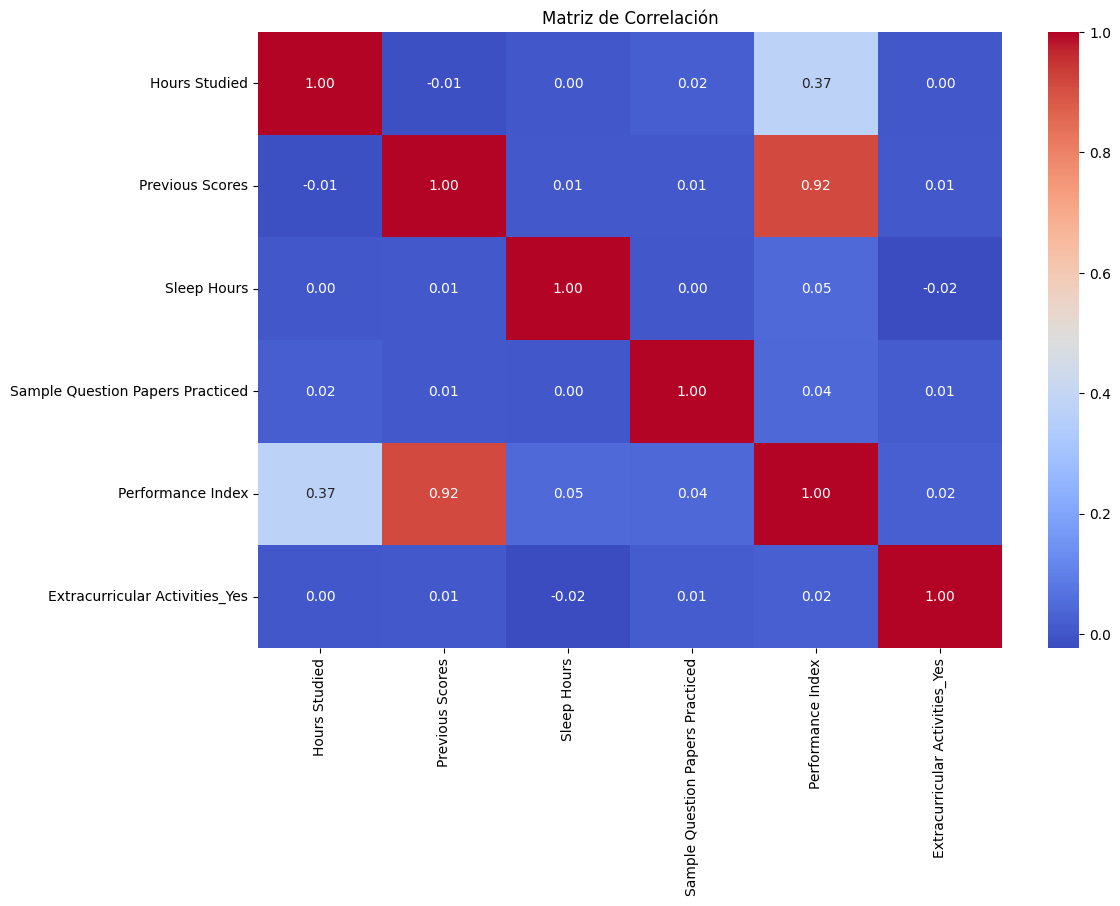

In [ ]:
# Calcular la matriz de correlación
# Explicar la relación entre variables
# Calcular la matriz de correlación
corr_matrix = df_encoded.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Relación entre las variables

1.   **Hours Studied (Horas de Estudio)**:
  *   **Correlación con Previous Scores (Puntuaciones Anteriores)**: -0.01 Nos dice que no ehay relación lineal signficicativa entre las horas de estudio y las calificaciones anteriores.
  *   **Correlación con Sleep Hours (Horas de Sueño)**: 0 sugiere que no existe relación entre las horass de estudio y las horas de sueño
  *   **Correlación con Sample Question Papers Practiced   (Cuestionarios practicados)**: 0.02 indica que no existe una relación entre las horas estudiadas y los cuestionarios de ejemplo contestados.
  *   **Correlación con Performance Index (Índice de Rendimiento)**: 0.37, aquí ya podemos ver una correlación postivia muy ligera, indicando que el rendimiento esta relacionado con las horas de estudios, al ser positivo signfica que a mas horas de estudio se tiende a mejorar el rendimiento, aunque la relación no es muy fuerte.
  * **Correlación con Extracurricular Activities (Actividades Extracurriculares)**: 0 (nula). Las actividades extracurriculares no parecen tener ninguna relación significativa con las horas de estudio.

2.   **Previous Scores (Puntuaciones Anteriores)**:
  * **Correlación con Performance Index (Índice de Rendimiento)**: 0.92 (muy fuerte). Esto indica que las puntuaciones anteriores tienen una relación fuertemente positiva con el rendimiento actual. Es decir, si las puntuaciones previas son altas, es probable que el rendimiento actual también sea alto; en otras palabras, los alumnos que sacan buenas notas tienden a seguir sacando buenas notas y los que no siguen sacando bajas.
  * **Correlaciones restantes**: Las relaciones entre las horas de sueño, examenes de practica y actividades extracurriculares nos indica que son casi nulas, por lo que no tienen una correlación signficiativa con los puntuajes anteriores.
3.   **Correlaciones restantes**:
  * **Sleep Hours(Horas de sueño)**: Indica que no se correlaciona signficiativamente con las demas.
  * **Sample Question Papers Practiced**: Indica que no se correlaciona signficiativamente con las demas.
  * **Extracurricular Activities**: Indica que no se correlaciona signficiativamente con las demas.

La variable mas importante es la de Previous Scores(Puntaciones anteriores), ya que tiene una correlación muy fuerte con el indice de rendimiento. Nos dice que es el mejor predictor de rendimiento futuro. Sin olvidar que las horas de estudio tienen su impacto moderado.



In [ ]:
# Obtener valores de los coeficientes del conjunto de datos de forma manual y con funciones
# Separar las características independientes (X) y la variable dependiente (y)
X = df_encoded.drop('Performance Index', axis=1)  # Supongamos que 'G3' es la variable dependiente
y = df_encoded['Performance Index']

# Convertir booleanos a enteros
X_encoded = X.astype(int)

# Añadir una columna de unos a X_encoded para el término independiente (intercepto)
X_manual = np.c_[np.ones(X_encoded.shape[0]), X_encoded]

# Calcular los coeficientes manualmente usando la fórmula de la regresión lineal
coeficientes_manual = np.linalg.inv(X_manual.T.dot(X_manual)).dot(X_manual.T).dot(y)
print("Coeficientes calculados manualmente:", coeficientes_manual)

##Ahora con libreriras
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo con los datos
modelo.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_
print("Coeficientes con scikit-learn:", coeficientes)


Coeficientes calculados manualmente: [-34.07558809   2.85298205   1.01843419   0.48055975   0.19380214
   0.61289758]
Coeficientes con scikit-learn: [2.85298205 1.01843419 0.48055975 0.19380214 0.61289758]


---
# Valor P de las caracteristicas

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el término independiente
X_const = sm.add_constant(X_encoded)

# Crear el modelo OLS (Ordinary Least Squares)
modelo_ols = sm.OLS(y, X_const).fit()

# Mostrar el resumen del modelo, que incluye los valores p
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:03:57   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Como sabemos el valor p indica la probabilidad de que el coeficiente de una caracteristíca sea cero, en otras palabras, que la variable independiente no tenga efecto sobre la variable dependiente.
En este caso podemos ver que todas son signficativas para el modelo de regresión, pero en diferente medida, como vemos las horas estudiadas tiene el coeficiente mas signficativo junto los puntuajes anteriores, fuera de estos son muy bajos pero aun considerados signficativos.

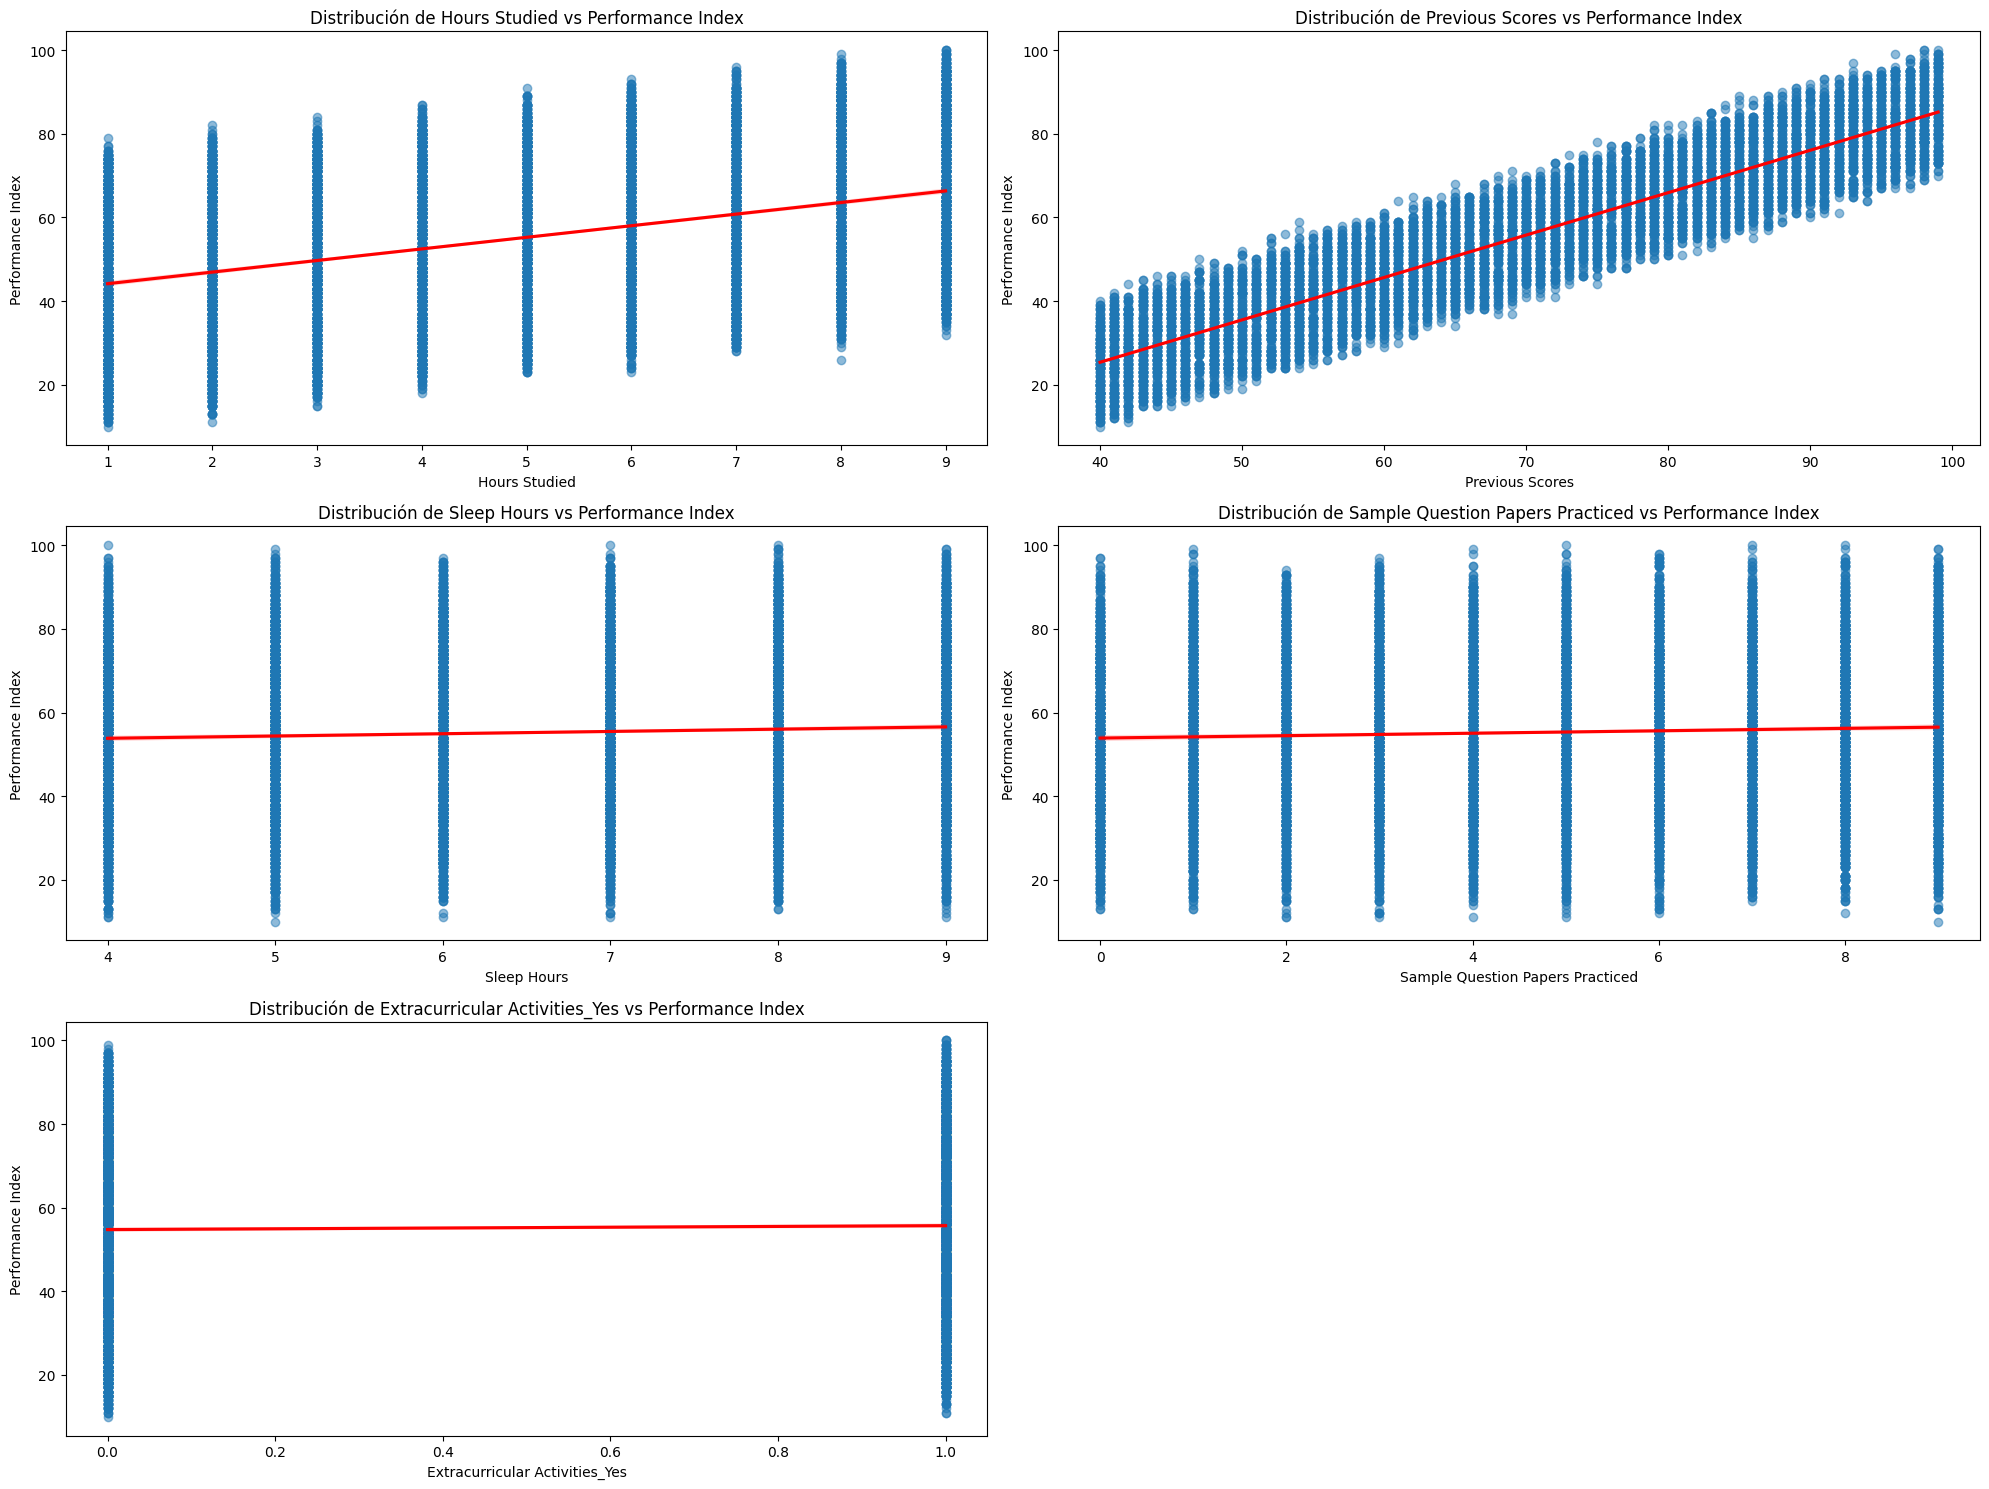

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Supongamos que tus variables independientes son:
# 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes'

variables_independientes = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes']

# Configuración de la figura
plt.figure(figsize=(20, 15))

# Iterar sobre cada variable independiente
for i, var in enumerate(variables_independientes):
    plt.subplot(3, 2, i + 1)  # Crear subgráficas
    sns.regplot(x=var, y='Performance Index', data=df_encoded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Distribución de {var} vs Performance Index')
    plt.xlabel(var)
    plt.ylabel('Performance Index')

plt.tight_layout()
plt.show()


In [ ]:
# Función para calcular R-cuadrada y MSE
def calcular_metrica(var_independiente, var_dependiente):
    X = df_encoded[[var_independiente]]
    y = df_encoded[var_dependiente]

    # Añadir una columna de unos para el término independiente
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(y, X).fit()

    # Predicciones
    y_pred = model.predict(X)

    # Calcular MSE
    mse = np.mean((y - y_pred) ** 2)

    return model.rsquared, mse

# Convertir columnas a numérico y manejar errores
# Convertir las columnas a numéricas, asegurando que las booleanas se conviertan correctamente
for var in variables_independientes:
    if df_encoded[var].dtype == bool:
        df_encoded[var] = df_encoded[var].astype(int)
    else:
        df_encoded[var] = pd.to_numeric(df_encoded[var], errors='coerce')

# Asegurarse de que la variable dependiente también sea numérica
df_encoded['Performance Index'] = pd.to_numeric(df_encoded['Performance Index'], errors='coerce')

# Eliminar filas con valores NaN
df_encoded = df_encoded.dropna()

# Asegurarse de que las variables se han convertido correctamente
for var in variables_independientes + ['Performance Index']:
    if not np.issubdtype(df_encoded[var].dtype, np.number):
        raise ValueError(f"La columna '{var}' no se ha convertido a numérica correctamente.")

# Evaluar cada variable independiente
for var in variables_independientes:
    r_squared, mse = calcular_metrica(var, 'Performance Index')
    print(f"Variable: {var} - R-squared: {r_squared:.4f}, MSE: {mse:.4f}")

Variable: Hours Studied - R-squared: 0.1397, MSE: 317.5337
Variable: Previous Scores - R-squared: 0.8376, MSE: 59.9501
Variable: Sleep Hours - R-squared: 0.0023, MSE: 368.2313
Variable: Sample Question Papers Practiced - R-squared: 0.0019, MSE: 368.3945
Variable: Extracurricular Activities_Yes - R-squared: 0.0006, MSE: 368.8635


Basandonos que Previous Scores vs Perfomance Index muestra un casi 84% podemos decir que es un predictor muy fuerte del rendimiento actual, ademas que es el que menor MSE presenta, lo que reduce considerablemente los errores basados en la prediccion de esta variable.

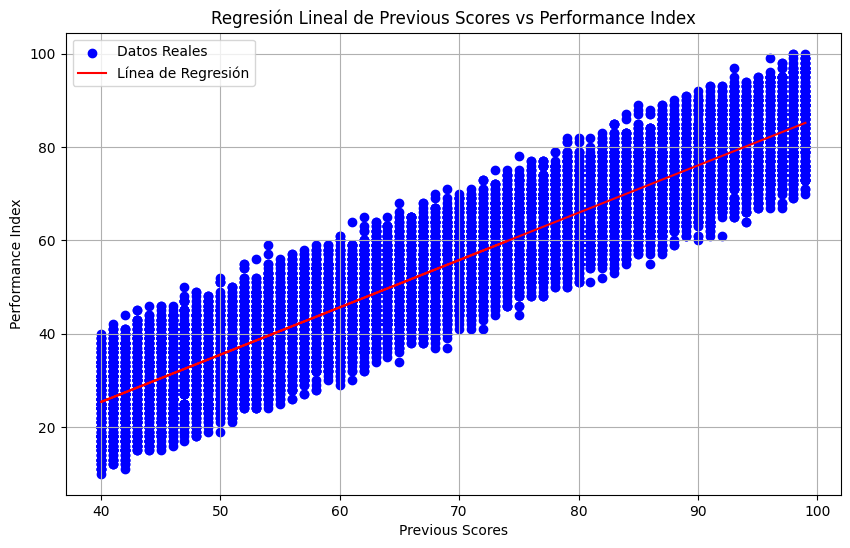

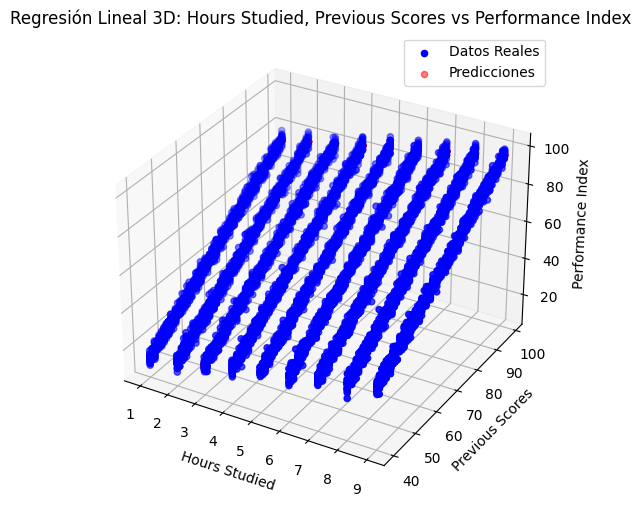

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Graficar en 2D para la mejor variable (Previous Scores)
def graficar_2d(var_independiente, var_dependiente):
    X = df_encoded[[var_independiente]]
    y = df_encoded[var_dependiente]

    # Añadir una columna de unos para el término independiente
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(y, X).fit()

    # Predicciones
    y_pred = model.predict(X)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(df_encoded[var_independiente], y, color='blue', label='Datos Reales')
    plt.plot(df_encoded[var_independiente], y_pred, color='red', label='Línea de Regresión')
    plt.title(f'Regresión Lineal de {var_independiente} vs {var_dependiente}')
    plt.xlabel(var_independiente)
    plt.ylabel(var_dependiente)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar en 3D para las mejores dos variables
def graficar_3d(var_independiente1, var_independiente2, var_dependiente):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Datos
    x = df_encoded[var_independiente1]
    y = df_encoded[var_independiente2]
    z = df_encoded[var_dependiente]

    # Ajustar el modelo
    X = df_encoded[[var_independiente1, var_independiente2]]
    X = sm.add_constant(X)
    model = sm.OLS(z, X).fit()
    z_pred = model.predict(X)

    # Graficar los datos y la superficie de regresión
    ax.scatter(x, y, z, color='blue', label='Datos Reales')
    ax.scatter(x, y, z_pred, color='red', label='Predicciones', alpha=0.5)

    # Configuración de la gráfica
    ax.set_title(f'Regresión Lineal 3D: {var_independiente1}, {var_independiente2} vs {var_dependiente}')
    ax.set_xlabel(var_independiente1)
    ax.set_ylabel(var_independiente2)
    ax.set_zlabel(var_dependiente)
    ax.legend()
    plt.show()

# Graficar la regresión 2D usando la mejor variable 'Previous Scores'
graficar_2d('Previous Scores', 'Performance Index')

# Graficar la regresión 3D usando 'Hours Studied' y 'Previous Scores'
graficar_3d('Hours Studied', 'Previous Scores', 'Performance Index')


Intepretando los resultados obtenidos de las métricas de validación (R-squared y MSE) y los coeficientes del modelo de regresión lineal obtenemos:

1. Métricas de Validación
  * R-squared (R²):
    * Hours Studied: 0.1397
    * Previous Scores: 0.8376
    * Sleep Hours: 0.0023
    * Sample Question Papers Practiced: 0.0019
    * Extracurricular Activities_Yes: 0.0006

  Previous Scores es el predictor más fuerte, con un R² de 0.8376, lo que significa que la variabilidad en el rendimiento puede ser explicado por los puntajes anteriores.

  Las demás variables tienen un impacto mínimo, con valores de R² cercanos a cero, lo que indica que no explican prácticamente nada de la variabilidad del rendimiento.


2. MSE (Error Cuadrático Medio)

  Los valores de MSE para cada variable son:
  * Hours Studied: 317.5337
  * Previous Scores: 59.9501
  * Sleep Hours: 368.2313
  * Sample Question Papers Practiced: 368.3945
  * Extracurricular Activities_Yes: 368.8635

  El MSE más bajo (59.9501) corresponde a Previous Scores, lo que indica que este predictor tiene la mayor precisión en sus predicciones. Los otros valores de MSE son considerablemente más altos, lo que sugiere que el rendimiento de las predicciones basadas en esas variables es pobre.

3. Coeficientes del Modelo
  * Hours Studied: 2.85
  * Previous Scores: 1.02
  * Sleep Hours: 0.48
  * Sample Question Papers Practiced: 0.19
  * Extracurricular Activities_Yes: 0.61

  Hours Studied (Coeficiente: 2.85):
  Por cada hora adicional de estudio, se espera que el Performance Index aumente en 2.85 puntos. A mas horas de estudio tienen un impacto considerable en el rendimiento del estudiante.

  Previous Scores (Coeficiente: 1.02):
  Un buen desempeño anterior es un buen predictor de futuros resultados.

  Sleep Hours (Coeficiente: 0.48):
  Dormir más parece tener un pequeño impacto positivo, aunque este efecto es más débil que el de otras variables como horas de estudio o puntajes anteriores.

  Sample Question Papers Practiced (Coeficiente: 0.19):
  Practicar exámenes de muestra tiene un impacto pequeño en el rendimiento, lo que podría indicar que, si bien útil, no es el factor más determinante.

  Extracurricular Activities_Yes (Coeficiente: 0.61):
  Los estudiantes involucrados en actividades extracurriculares podrían ver un ligero beneficio en su rendimiento académico, aunque el impacto es menor que el de horas de estudio o puntajes anteriores. Yo lo relacionaría mas a que tratan de mantener un buen promedio para que les sigan permitiendo participar en actividades curriculares.

Conclusión:

Horas de Estudio y Puntajes Previos son los factores más influyentes, con coeficientes altos (2.85 y 1.02), lo que sugiere que estudiar más y haber tenido un buen desempeño previo son los factores más importantes para predecir un mejor rendimiento.